In [16]:
# Install dependencies
!pip install -q -U pandas plotly nbformat kaleido


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [17]:
# Clone repo to get access to data/ directory
!git clone https://github.com/andreped/breast-cancer-stats.git
%cd breast-cancer-stats/apps/

fatal: destination path 'breast-cancer-stats' already exists and is not an empty directory.
/Users/andreped/workspace/breast-cancer-stats/apps/breast-cancer-stats/apps


Label Denmark Finland Iceland Norway Sweden
1951      4.5       -     5.8      -      -
1952      4.4       -     3.6      -    3.2
1953      4.5     1.9     2.6      -    3.4
1954      4.7     2.0     2.0      -    3.3
1955      4.9     2.0     3.1      -    3.3
...       ...     ...     ...    ...    ...
2016      3.2     2.5     3.3    2.1    2.3
2017      3.3     2.6     2.9    2.0    2.3
2018      3.0     2.4     2.4    2.2    2.2
2019      2.9     2.5     3.1    2.0    2.1
2020      2.9     2.6     2.8    2.0    2.2

[70 rows x 5 columns]


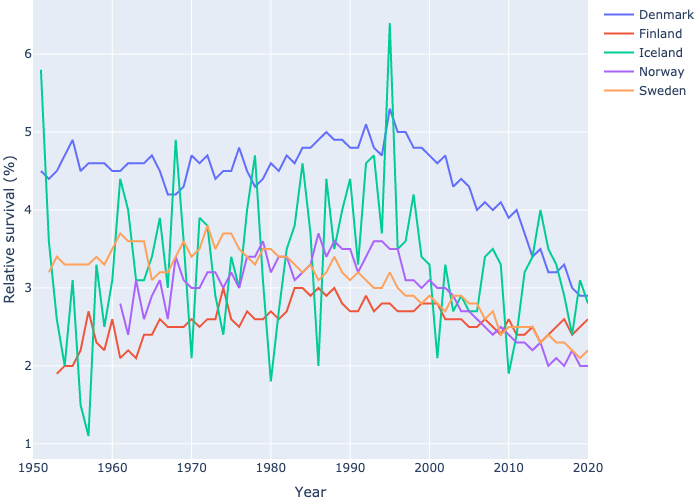

In [18]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import os


# load cancer data
data = pd.read_csv("../data/NCdata-trends-cum_risk-pop(578,246,208,352,752)-can(180)-mortality-females-age(0-84)-y(1943-2020).csv", header=0, index_col=0)
data = data.T

print(data)

figures = []
for country in data.columns:
    figures.append(
        go.Scatter(
            name=country,
            x=np.asarray(data.index).astype("int"),
            y=data[country],
            mode='lines',
            showlegend=True,
        )
    )

layout = go.Layout(
    #xaxis=dict(title="Period of diagnosis"),
    xaxis=dict(
        title="Year",
        tickmode='linear', #change 1
        tick0=1960,#data.index.min(),
        dtick=10,
        tickvals=data.index,
    ),
    yaxis=dict(title="Relative survival (%)")
)

fig = go.Figure(figures, layout=layout, layout_xaxis_range=[1950, 2020])
fig.update_layout(
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin
    )
)

os.makedirs("results/", exist_ok=True)

fig.show(renderer="png")
fig.write_image("results/bc_mortality_over_time.png")